#SET 1: HOG features

In [ ]:
import numpy as np 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Load feature and label data
X_train = np.load("hog_features.npy")
y_train = np.load("labels_train.npy")
X_test  = np.load("hog_features_test.npy")
y_test  = np.load("labels_test.npy")


In [2]:
# Train a Logistic Classification model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [3]:
# Make predictions
y_pred = model.predict(X_test)



In [4]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.7371
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.56      0.54       723
           1       0.72      0.71      0.71      1203
           2       0.83      0.79      0.81      2038
           3       0.75      0.92      0.83       269

    accuracy                           0.74      4233
   macro avg       0.71      0.75      0.72      4233
weighted avg       0.74      0.74      0.74      4233



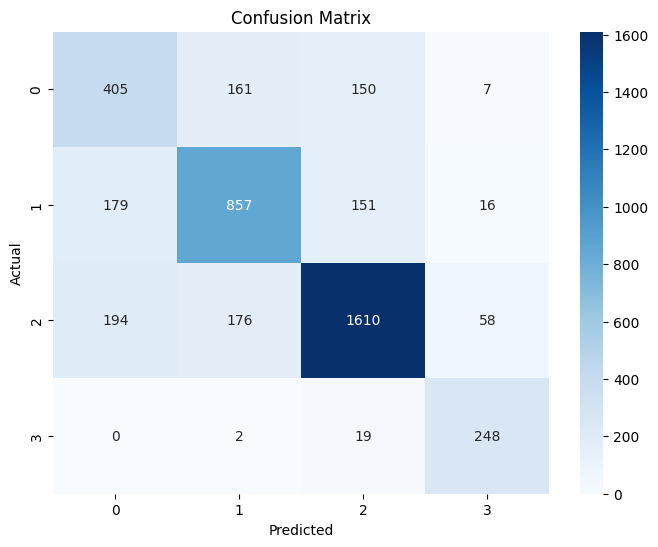

In [5]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()




In [6]:
# Save model to existing relative path
model_path = "../models/logistic_classification_hog_model.pkl"
joblib.dump(model, model_path)
print(f"Model saved at: {model_path}")

Model saved at: ../models/logistic_classification_hog_model.pkl


#SET 2 :NORMALISED IMAGED WITH MASK RESIZED

In [4]:
# Define paths
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import os
import os
base_path = "../data"
base_path_out = os.path.join(base_path, "processed")

# Step 1: Load the train and test data from the .npz files
train_data = np.load(os.path.join(base_path_out, 'train_data_resized20_with_masks.npz'))
X_train = train_data['X_train']
y_train = train_data['y_train']

test_data = np.load(os.path.join(base_path_out, 'test_data_resized20_with_masks.npz'))
X_test = test_data['X_test']
y_test = test_data['y_test']

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (35059, 400)
y_train shape: (35059,)
X_test shape: (4233, 400)
y_test shape: (4233,)


In [5]:
# Step 2: Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Step 3: Train the model
model.fit(X_train, y_train)

# Step 4: Predict using the trained model
y_pred = model.predict(X_test)

c:\Users\arfin\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 58.04%


In [7]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.32      0.34       723
           1       0.57      0.59      0.58      1203
           2       0.72      0.62      0.67      2038
           3       0.42      0.90      0.57       269

    accuracy                           0.58      4233
   macro avg       0.52      0.61      0.54      4233
weighted avg       0.60      0.58      0.58      4233



Confusion Matrix:


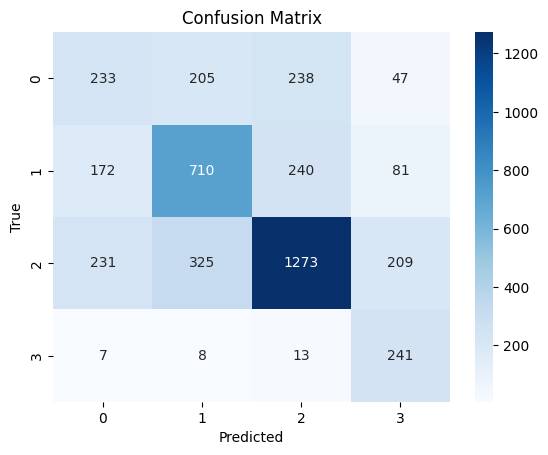

In [8]:
# Print confusion matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [9]:
# Save model to existing relative path
import joblib
model_path = "../models/logistic_classification_with_masks_size20_model.pkl"
joblib.dump(model, model_path)
print(f"Model saved at: {model_path}")

Model saved at: ../models/logistic_classification_with_masks_size20_model.pkl


#SET3:NORMALISED IMAGEs WITHOUT MASK-notfiltered


#SET4: NORMALIZED IMAGES WITHOUT MASK -filtered